# 1) Delivery_time -> Predict delivery time using sorting time 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("delivery_time.csv")
df.head() 

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

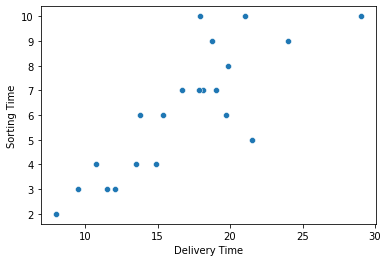

In [5]:
sns.scatterplot(x="Delivery Time",y='Sorting Time',data=df)

In [6]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

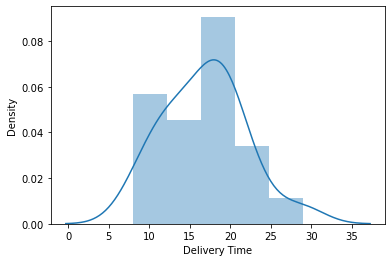

In [7]:
sns.distplot(df['Delivery Time'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

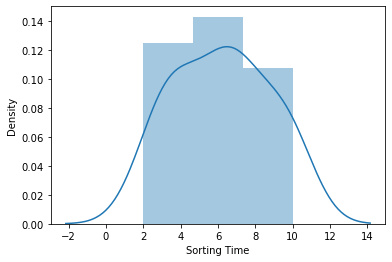

In [8]:
sns.distplot(df['Sorting Time'])

In [9]:
df=df.rename({'Delivery Time':'DeliveryTime', 'Sorting Time':'SortingTime'},axis=1)
df.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
import statsmodels.formula.api as smf

In [11]:
model1=smf.ols("DeliveryTime~SortingTime",data=df).fit()

<AxesSubplot:xlabel='DeliveryTime', ylabel='SortingTime'>

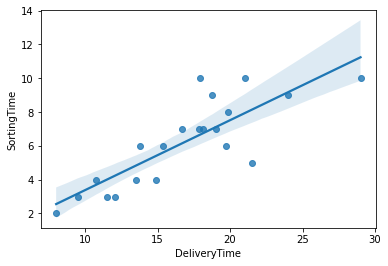

In [12]:
sns.regplot(x='DeliveryTime',y='SortingTime',data=df)

In [13]:
model1.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [15]:
print(model1.tvalues)
print(model1.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64
Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [50]:
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [16]:
model1.rsquared

0.6822714748417231

In [20]:
import numpy as np
df['log_SortingTime']=np.log(df['SortingTime'])

In [22]:
df['log_DeliveryTime']=np.log(df['DeliveryTime'])
df['sqrt_SortingTime']=np.sqrt(df['SortingTime'])
df['sqrt_DeliveryTime']=np.sqrt(df['DeliveryTime'])
df['sq_SortingTime']=np.square(df['SortingTime'])
df['sq_DeliveryTime']=np.square(df['DeliveryTime'])

In [23]:
df.head()

,DeliveryTime,SortingTime,log_SortingTime,log_DeliveryTime,sqrt_SortingTime,sqrt_DeliveryTime,sq_SortingTime,sq_DeliveryTime
0,21.00,10,2.302585,3.044522,3.162278,4.582576,100,441.0000
1,13.50,4,1.386294,2.602690,2.000000,3.674235,16,182.2500
2,19.75,6,1.791759,2.983153,2.449490,4.444097,36,390.0625
3,24.00,9,2.197225,3.178054,3.000000,4.898979,81,576.0000
4,29.00,10,2.302585,3.367296,3.162278,5.385165,100,841.0000


### log transformation on x

In [25]:
model2=smf.ols('DeliveryTime~log_SortingTime',data=df).fit()

In [29]:
print(model2.pvalues)
print(model2.rsquared)

Intercept          0.641980
log_SortingTime    0.000003
dtype: float64
0.6954434611324223


### log transformation on y

In [30]:
model3=smf.ols('log_DeliveryTime~SortingTime',data=df).fit()

In [31]:
print(model3.pvalues)
print(model3.rsquared)

Intercept      1.857343e-14
SortingTime    1.592708e-06
dtype: float64
0.7109478980584187


### log transformation on both x and y

In [32]:
model4=smf.ols("log_DeliveryTime~log_SortingTime",data=df).fit()

In [33]:
print(model4.pvalues)
print(model4.rsquared)

Intercept          5.921137e-11
log_SortingTime    1.601539e-07
dtype: float64
0.77216134926874


### sqrt transformation on x

In [34]:
model5=smf.ols('DeliveryTime~sqrt_SortingTime',data=df).fit()
print(model5.pvalues)
print(model5.rsquared)

Intercept           0.410857
sqrt_SortingTime    0.000003
dtype: float64
0.6958062276308671


### sqrt tarnsformation on y

In [35]:
model6=smf.ols('sqrt_DeliveryTime~SortingTime',data=df).fit()
print(model6.pvalues)
print(model6.rsquared)

Intercept      3.339366e-11
SortingTime    2.001215e-06
dtype: float64
0.704049871541756


### sqrt transformation on both x and y

In [37]:
model7=smf.ols('sqrt_DeliveryTime~sqrt_SortingTime',data=df).fit()
print(model7.pvalues)
print(model7.rsquared)

Intercept           1.833621e-04
sqrt_SortingTime    8.475706e-07
dtype: float64
0.7292011987544664


### square transformation on x

In [38]:
model8=smf.ols('DeliveryTime~sq_SortingTime',data=df).fit()
print(model8.pvalues)
print(model8.rsquared)

Intercept         1.415704e-08
sq_SortingTime    1.739194e-05
dtype: float64
0.6302871815826637


### squre transformation on y

In [39]:
model9=smf.ols('sq_DeliveryTime~SortingTime',data=df).fit()
print(model9.pvalues)
print(model9.rsquared)

Intercept      0.593778
SortingTime    0.000035
dtype: float64
0.6026728443618878


### square transformation on both x and y

In [40]:
model10=smf.ols('sq_DeliveryTime~sq_SortingTime',data=df).fit()
print(model10.pvalues)
print(model10.rsquared)

Intercept         0.020675
sq_SortingTime    0.000050
dtype: float64
0.5881883446986836


## As observed the model4(log tranformation on both x and y) gives the greater r-squared value when compared to the other model

In [13]:
#method 2
from sklearn import linear_model

In [20]:
reg=linear_model.LinearRegression()
reg.fit(df[["Sorting Time"]],df["Delivery Time"])

LinearRegression()

In [21]:
reg.intercept_

6.58273397199706

In [22]:
reg.coef_

array([1.6490199])

In [26]:
reg.predict([[10]])

array([23.07293294])

# 2) Salary_hike -> Build a prediction model for Salary_hike


In [42]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
model=smf.ols('Salary~YearsExperience',data=df).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

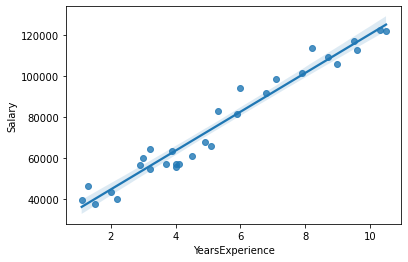

In [44]:
sns.regplot(x="YearsExperience",y="Salary",data=df)

In [45]:
model.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [46]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [47]:
model.rsquared

0.9569566641435086

In [48]:
print(model.tvalues)
print(model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [49]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [50]:
df['log_YearsExperience']=np.log(df['YearsExperience'])
df['log_Salary']=np.log(df['Salary'])
df['sqrt_YearsExperience']=np.sqrt(df['YearsExperience'])
df['sqrt_Salary']=np.sqrt(df['Salary'])
df['sq_YearsExperience']=np.square(df['YearsExperience'])
df['sq_Salary']=np.square(df['Salary'])

In [51]:
df.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary,sqrt_YearsExperience,sqrt_Salary,sq_YearsExperience,sq_Salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700,1.21,1.547872e+09
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483,1.69,2.134902e+09
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691,2.25,1.423628e+09
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460,4.00,1.894426e+09
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314,4.84,1.591292e+09


### log tranformation on x

In [53]:
model2=smf.ols('Salary~log_YearsExperience',data=df).fit()
print(model2.pvalues)
print(model2.rsquared)

Intercept              7.268813e-03
log_YearsExperience    3.250155e-13
dtype: float64
0.8538888828756969


### log tranformation on y 

In [54]:
model3=smf.ols('log_Salary~YearsExperience',data=df).fit()
print(model3.pvalues)
print(model3.rsquared)

Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64
0.9319671194084195


### log tranformation on both x and y

In [55]:
model4=smf.ols('log_Salary~log_YearsExperience',data=df).fit()
print(model4.pvalues)
print(model4.rsquared)

Intercept              9.073132e-45
log_YearsExperience    7.395278e-16
dtype: float64
0.9052150725817149


### sqrt transformation on x

In [56]:
model5=smf.ols('Salary~sqrt_YearsExperience',data=df).fit()
print(model5.pvalues)
print(model5.rsquared)

Intercept               2.906965e-03
sqrt_YearsExperience    8.565358e-18
dtype: float64
0.9310009544993526


### sqtr transformation on y

In [57]:
model6=smf.ols('sqrt_Salary~YearsExperience',data=df).fit()
print(model6.pvalues)
print(model6.rsquared)

Intercept          1.920194e-26
YearsExperience    9.782891e-20
dtype: float64
0.9498353533865289


### sqrt tranformation on both x and y

In [60]:
model7=smf.ols('sqrt_Salary~sqrt_YearsExperience',data=df).fit()
print(model7.pvalues)
print(model7.rsquared)

Intercept               4.141645e-13
sqrt_YearsExperience    7.584326e-19
dtype: float64
0.9419490138976825


### square tranformation on x

In [61]:
model8=smf.ols('Salary~sq_YearsExperience',data=df).fit()
print(model8.pvalues)
print(model8.rsquared)

Intercept             3.389190e-19
sq_YearsExperience    1.518127e-16
dtype: float64
0.9153198857852565


### sqare transformaion on y

In [62]:
model9=smf.ols('sq_Salary~YearsExperience',data=df).fit()
print(model9.pvalues)
print(model9.rsquared)

Intercept          5.114661e-04
YearsExperience    2.152535e-19
dtype: float64
0.946933959304622


### square transformation on both x and y

In [63]:
model10=smf.ols('sq_Salary~YearsExperience',data=df).fit()
print(model10.pvalues)
print(model10.rsquared)

Intercept          5.114661e-04
YearsExperience    2.152535e-19
dtype: float64
0.946933959304622


## As observed the model with no tranformation applied gives the greater r-squared value when compared to the other models